**11.	What is the average duration of matches?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading requierde tables

In [2]:
MatchTimeInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchTimeInfo.csv')

In [3]:
MatchTimeInfo.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,12260075,3463.0,3855.0,NaN,NaN,NaN,1.714511e+09
1,12260076,3032.0,2121.0,2674.0,NaN,NaN,1.714492e+09
2,12260077,2747.0,3525.0,4074.0,NaN,NaN,1.714492e+09
3,12260078,2519.0,2531.0,2121.0,NaN,NaN,1.714578e+09
4,12260080,2616.0,2766.0,NaN,NaN,NaN,1.714483e+09


**Calculating match duration**

Each finished match should have 2 sets at least ,so the records with less than 2 period have been 
after recognizing finished matches , there are sum duplicated data for several matches that should by droped.

In [28]:
MatchTimeInfo_dd = MatchTimeInfo.drop_duplicates()
MatchTimeInfo_f = MatchTimeInfo_dd.loc[(MatchTimeInfo_dd['period_1'].notnull()) & (MatchTimeInfo_dd['period_2'].notnull())]
MatchTimeInfo_fin = MatchTimeInfo_f.drop_duplicates(subset = [ 'match_id'])
MatchTimeInfo_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6636 entries, 0 to 19672
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        6636 non-null   int64  
 1   period_1                        6636 non-null   float64
 2   period_2                        6636 non-null   float64
 3   period_3                        2009 non-null   float64
 4   period_4                        55 non-null     float64
 5   period_5                        22 non-null     float64
 6   current_period_start_timestamp  6636 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 414.8 KB


Summation the values of period's times and adding it in a new column 

In [29]:
MatchTimeInfo_fin.fillna(0, inplace=True)
MatchTimeInfo_fin ['sum'] = MatchTimeInfo_fin[MatchTimeInfo_fin.columns[1:6]].sum(axis=1)
MatchTimeInfo_fin.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6636 entries, 0 to 19672
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        6636 non-null   int64  
 1   period_1                        6636 non-null   float64
 2   period_2                        6636 non-null   float64
 3   period_3                        6636 non-null   float64
 4   period_4                        6636 non-null   float64
 5   period_5                        6636 non-null   float64
 6   current_period_start_timestamp  6636 non-null   float64
 7   sum                             6636 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 466.6 KB


C:\Users\Maedeh\AppData\Local\Temp\ipykernel_14120\1743729347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchTimeInfo_fin.fillna(0, inplace=True)
C:\Users\Maedeh\AppData\Local\Temp\ipykernel_14120\1743729347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchTimeInfo_fin ['sum'] = MatchTimeInfo_fin[MatchTimeInfo_fin.columns[1:6]].sum(axis=1)


In data several matches with more that 12 hours duration exsit that are not valid as the longest game in mteniss matche s in the world lasts less than 12 hours
so we droped the invalid data

In [31]:
MatchTimeInfo_fins = MatchTimeInfo_fin [MatchTimeInfo_fin ['sum']< 12 * 3600]
MatchTimeInfo_fins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6561 entries, 0 to 19672
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        6561 non-null   int64  
 1   period_1                        6561 non-null   float64
 2   period_2                        6561 non-null   float64
 3   period_3                        6561 non-null   float64
 4   period_4                        6561 non-null   float64
 5   period_5                        6561 non-null   float64
 6   current_period_start_timestamp  6561 non-null   float64
 7   sum                             6561 non-null   float64
 8   sum_zscore                      6561 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 512.6 KB


**Reporting the result**

In [33]:
AVG = MatchTimeInfo_fins['sum'].mean()
print(f'The average of match duration is {AVG}')

The average of match duration is 6625.516079865874


Plotting match duration histogram

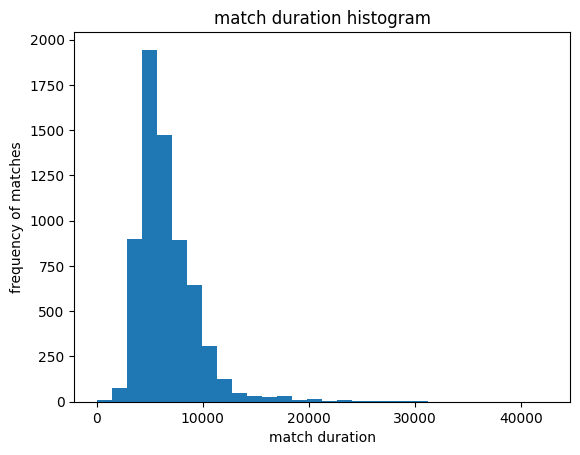

In [36]:
plt.hist(MatchTimeInfo_fins['sum'] , bins= 30)
plt.xlabel('match duration')
plt.ylabel('frequency of matches')
plt.title('match duration histogram')
plt.show()